# Assignment 2
Pull weather data from link provided and plot various pieces of data.

Undertaken for the [Programming for Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics#:~:text=Programming%20for%20Data%20Analytics) module as part of the [Higher Diploma in Science in Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics) at ATU.

I will begin by importing some modules that will assist my analysis.

In [78]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for visualisations
from datetime import datetime

# set Seaborn visual theme for plots
sns.set()

I'll pull the data from the provided link into a CSV file, then use <code>.head()</code> to review the data.

I have taken a look at the sheet in advance, so I know I will need to use <code>skiprows</code> to prepare the header row.

In [79]:
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, skiprows=22, low_memory=False)
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


Let's use <code>.info()</code> to see what datatypes we have in the file.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

A mix of **Ints**, **Floats**, and **Objects**.

The first thing I'd like to do here is convert that *date* column into a *datetime* format. I won't be able to plot anything unless I do that. I'll use <code>.to_datetime()</code> to convert it, and then check the datatype.

In [81]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

df['date'].dtype

dtype('<M8[ns]')

## Plot the Temperature
The first plot that I have been asked to do is to simply *plot the temperature*, which is straightforward enough at this stage, so I'll start with that.

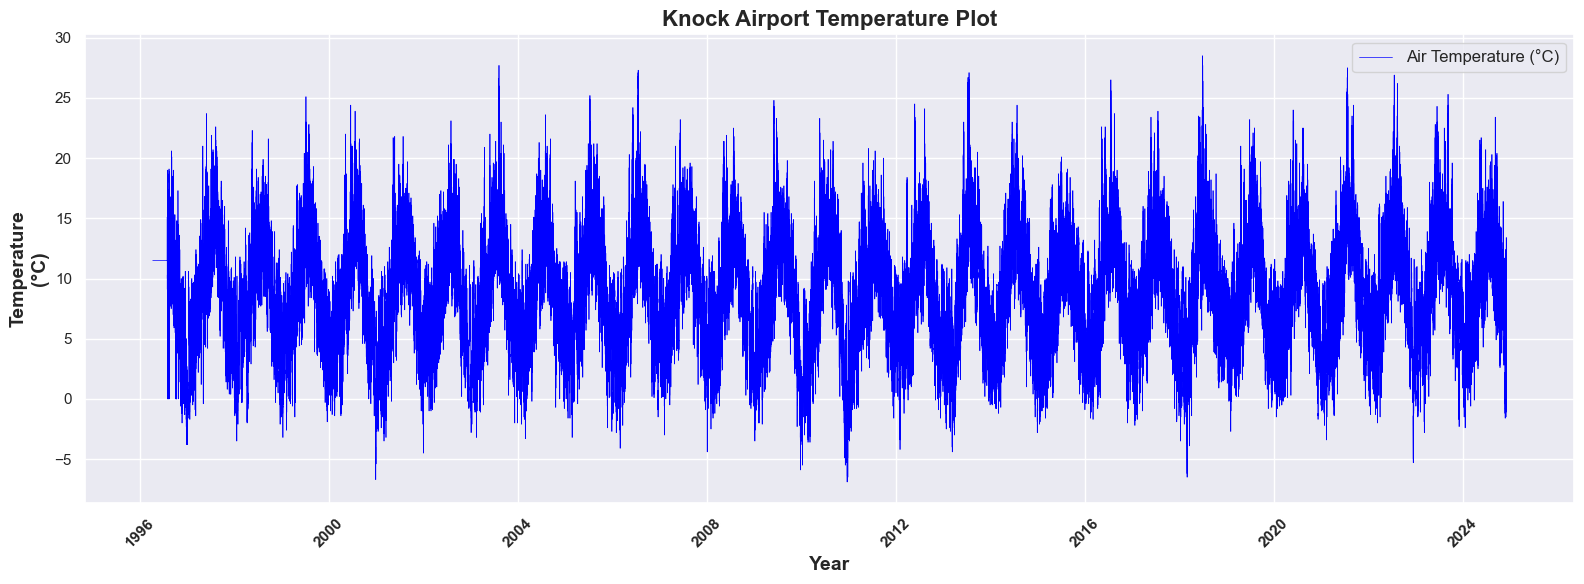

In [82]:
# extract the required columns as time and temp
time = df['date']
temp = df['temp']

# plot the data
plt.figure(figsize=(16, 6))
plt.plot(time, temp, label='Air Temperature (°C)', color='blue', linewidth=0.5)

# customize the plot
plt.title('Knock Airport Temperature Plot', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Temperature\n(°C)', fontsize=14, weight='bold')
plt.legend(fontsize=12)
plt.xticks(rotation=45, weight='bold')

# show the plot
plt.tight_layout()
plt.show()

## Plot Daily Mean Temperature
The temperature plot is a bit messy, but that's to be expected when trying to plot an hourly reading over an eight year period.

The next task is to *plot the mean temperature for each day*, so let's attempt that now.